<a href="https://colab.research.google.com/github/PatrickNAquino/Tech-Layoffs/blob/main/Tech_Layoffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Layoffs
Reported worldwide layoffs in tech companies from 2020 to 2024 - https://www.kaggle.com/datasets/ulrikeherold/tech-layoffs-2020-2024/*data*


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
#read the csv file
df = pd.read_excel('tech_layoffs.xlsx')

## Understanding the Data

In [4]:
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [5]:
df.shape

(1672, 16)

In [6]:
df.columns

Index(['#', 'Company', 'Location_HQ', 'Country', 'Continent', 'Laid_Off',
       'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_$_mil', 'Year', 'lat', 'lng'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            1672 non-null   int64         
 1   Company                      1672 non-null   object        
 2   Location_HQ                  1672 non-null   object        
 3   Country                      1672 non-null   object        
 4   Continent                    1672 non-null   object        
 5   Laid_Off                     1565 non-null   float64       
 6   Date_layoffs                 1672 non-null   datetime64[ns]
 7   Percentage                   1570 non-null   float64       
 8   Company_Size_before_Layoffs  1511 non-null   float64       
 9   Company_Size_after_layoffs   1536 non-null   float64       
 10  Industry                     1672 non-null   object        
 11  Stage                        1672 non-null 

In [8]:
df.describe()

,#,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Year,lat,lng
count,1672.000000,1565.000000,1672,1570.000000,1511.000000,1536.000000,1672.000000,1672.000000,1672.000000
mean,2064.454545,278.387859,2022-08-06 04:08:02.296650752,22.908014,3656.882859,3319.764757,2022.200957,34.347327,-59.878868
min,3.000000,3.000000,2020-03-12 00:00:00,0.044980,4.000000,0.000000,2020.000000,-41.286640,-123.262044
25%,1209.750000,40.000000,2022-05-27 00:00:00,9.060269,218.000000,150.000000,2022.000000,34.052230,-122.325530
50%,2188.500000,87.000000,2022-11-17 00:00:00,15.000000,553.000000,424.000000,2022.000000,37.774930,-79.398640
75%,2990.250000,200.000000,2023-06-14 00:00:00,28.000000,1500.000000,1200.000000,2023.000000,42.358430,-0.125740
max,3537.000000,12000.000000,2024-03-28 00:00:00,100.000000,400000.000000,392000.000000,2024.000000,60.204767,174.775570
std,1023.379865,886.840962,NaN,22.639925,21855.230097,21048.185867,1.302412,18.010614,74.139291


## Data Cleaning & Preparation

In [9]:
  # Remove unecessary columns
  df = df[['Company', 'Location_HQ', 'Country', 'Continent', 'Laid_Off',
       'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_$_mil', 'Year']]

In [10]:
df['month'] = df['Date_layoffs'].dt.month_name

<ipython-input-10-8f5f48b648df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Date_layoffs'].dt.month_name


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Company                      1672 non-null   object        
 1   Location_HQ                  1672 non-null   object        
 2   Country                      1672 non-null   object        
 3   Continent                    1672 non-null   object        
 4   Laid_Off                     1565 non-null   float64       
 5   Date_layoffs                 1672 non-null   datetime64[ns]
 6   Percentage                   1570 non-null   float64       
 7   Company_Size_before_Layoffs  1511 non-null   float64       
 8   Company_Size_after_layoffs   1536 non-null   float64       
 9   Industry                     1672 non-null   object        
 10  Stage                        1672 non-null   object        
 11  Money_Raised_in_$_mil        1596 non-null 

In [12]:
# Drop Duplicates
df.drop_duplicates(inplace= True)

<ipython-input-12-e74f81bd9864>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace= True)


## Data Analysis

### Global Scenario

In [13]:
# Layoffs by Country
layoffs_by_country = df.groupby('Country')['Laid_Off'].sum()
layoffs_by_country = layoffs_by_country.sort_values(ascending=False).head(10)
layoffs_by_country

Country
USA               312970.0
India              28720.0
Germany            24004.0
United Kingdom     14065.0
Sweden             12727.0
Canada              8571.0
Brazil              7029.0
Singapore           5169.0
Israel              4730.0
Indonesia           2921.0
Name: Laid_Off, dtype: float64

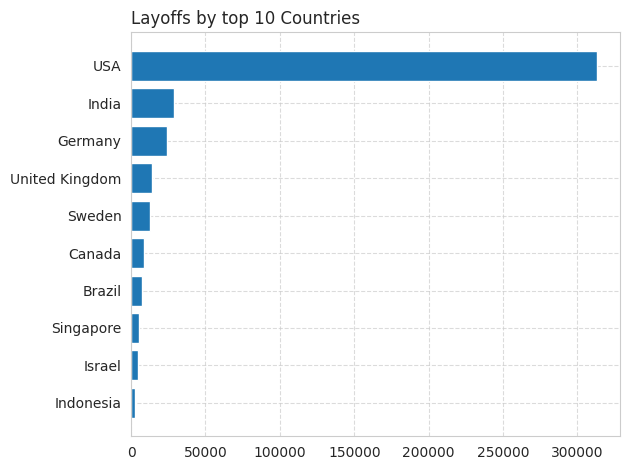

In [14]:
# Plotting
# Plot stacked bars for layoffs_by_country
plt.barh(layoffs_by_country.index, layoffs_by_country.values)

plt.title('Layoffs by top 10 Countries', loc='left', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the longest title on top
plt.tight_layout()
plt.show()

In [15]:
# Layoffs by industry
layoffs_by_industry = df.groupby('Industry')['Laid_Off'].sum()
layoffs_by_industry = layoffs_by_industry.sort_values(ascending=False).head(10)
layoffs_by_industry

Industry
Retail            59454.0
Consumer          57446.0
Other             49343.0
Transportation    35649.0
Finance           32815.0
Food              32572.0
Hardware          16861.0
Real Estate       15181.0
Healthcare        14545.0
Sales             14331.0
Name: Laid_Off, dtype: float64

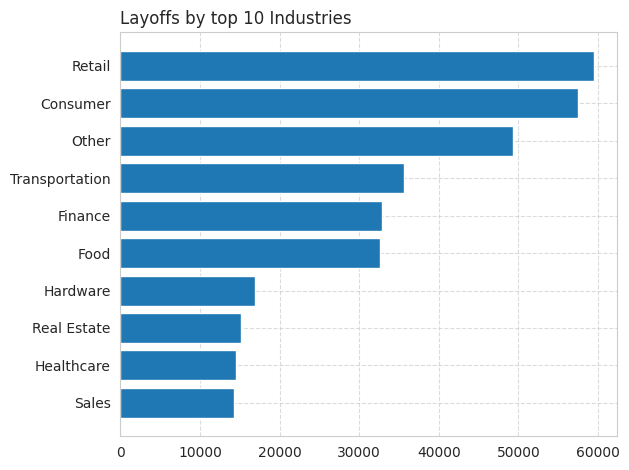

In [16]:
  # Plotting
# Plot stacked bars for layoffs_by_industry
plt.barh(layoffs_by_industry.index, layoffs_by_industry.values)

plt.title('Layoffs by top 10 Industries', loc='left', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the longest title on top
plt.tight_layout()
plt.show()

In [17]:
# Layoffs by Retail industry
layoffs_by_Retail_industry = df.query("Industry == 'Retail'").groupby('Company')['Laid_Off'].sum()
layoffs_by_Retail_companies = layoffs_by_Retail_industry.sort_values(ascending=False).head(10)
layoffs_by_Retail_companies

Company
Amazon        27580.0
Wayfair        4270.0
Shopify        3300.0
Groupon        3300.0
Farfetch       2000.0
Stitch Fix     1730.0
eBay           1520.0
Flipkart       1100.0
Jumia           900.0
Zulily          839.0
Name: Laid_Off, dtype: float64

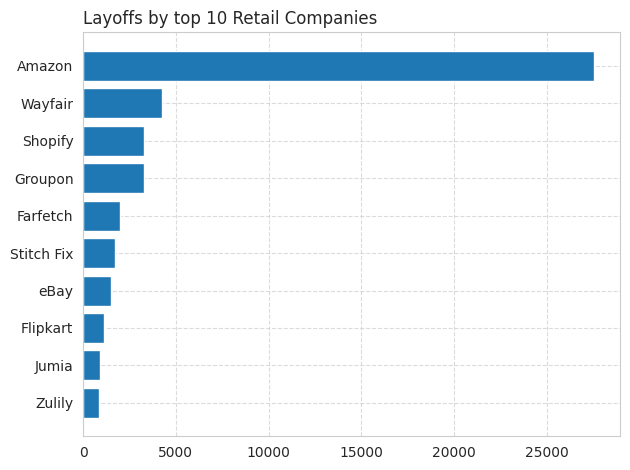

In [41]:
# Plotting
# Plot stacked bars for layoffs_by_Retail_companies
plt.barh(layoffs_by_Retail_companies.index, layoffs_by_Retail_companies.values)

plt.title('Layoffs by top 10 Retail Companies', loc='left', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the longest title on top
plt.tight_layout()

In [19]:
# Layoffs by company
layoffs_by_company = df.groupby('Company')['Laid_Off'].sum()
layoffs_by_company = layoffs_by_company.sort_values(ascending=False).head(10)
layoffs_by_company

Company
Amazon                   27580.0
Meta                     21000.0
Google                   13000.0
Microsoft                11900.0
SAP                      11000.0
SaleSan Franciscoorce    10000.0
Ericsson                  8500.0
Cisco                     8350.0
Flink                     8100.0
Uber                      7725.0
Name: Laid_Off, dtype: float64

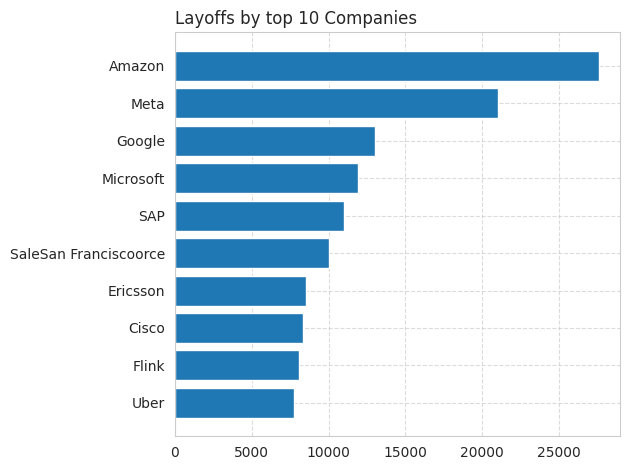

In [20]:
# Plotting
# Plot stacked bars for layoffs_by_company
plt.barh(layoffs_by_company.index, layoffs_by_company.values)

plt.title('Layoffs by top 10 Companies', loc='left', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the longest title on top
plt.tight_layout()
plt.show()

In [21]:
# Trend over time
layoffs_over_time = df.groupby('Year')['Laid_Off'].sum()
layoffs_over_time

Year
2020     61960.0
2021      6790.0
2022    128831.0
2023    177026.0
2024     60870.0
Name: Laid_Off, dtype: float64

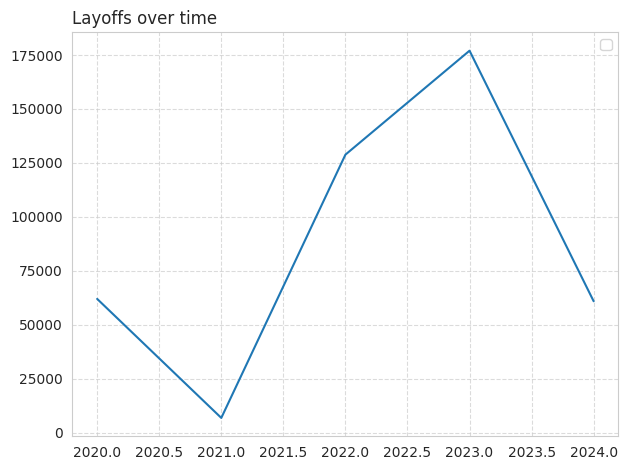

In [22]:
# Plotting
plt.plot(layoffs_over_time)
plt.grid(linestyle='--', alpha=0.7)
plt.title('Layoffs over time', loc='left', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### USA Scenario

In [23]:
# USA scenario
df_USA = df.query("Country == 'USA'")
df_USA

,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,month
2,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,<bound method PandasDelegate._add_delegate_acc...
4,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,<bound method PandasDelegate._add_delegate_acc...
5,Bolt,San Francisco Bay Area,USA,North America,130.0,2023-12-14,29.0,450.0,320.0,Finance,Series E,$1300,2023,<bound method PandasDelegate._add_delegate_acc...
6,Invitae,San Francisco Bay Area,USA,North America,235.0,2023-12-13,15.0,1567.0,1332.0,Healthcare,Post-IPO,NaN,2023,<bound method PandasDelegate._add_delegate_acc...
7,Etsy,New York City,USA,North America,225.0,2023-12-13,11.0,2045.0,1820.0,Retail,Post-IPO,$97,2023,<bound method PandasDelegate._add_delegate_acc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,Sojern,San Francisco Bay Area,USA,North America,NaN,2023-12-13,20.0,NaN,NaN,Marketing,Unknown,$172,2024,<bound method PandasDelegate._add_delegate_acc...
1668,Chipper Cash,San Francisco Bay Area,USA,North America,15.0,2023-12-11,33.0,45.0,30.0,Finance,Series C,$302,2024,<bound method PandasDelegate._add_delegate_acc...
1669,Jungle Scout,Austin,USA,North America,NaN,2023-12-09,NaN,NaN,NaN,Retail,Private …,$110,2024,<bound method PandasDelegate._add_delegate_acc...
1670,SmileDirectClub,Nashville,USA,North America,NaN,2023-12-09,100.0,NaN,0.0,Healthcare,Post-IPO,$694,2024,<bound method PandasDelegate._add_delegate_acc...


In [24]:
# Total Layoffs in USA
USA_Total_Layoffs = df_USA['Laid_Off'].sum()
USA_Total_Layoffs

312970.0

In [25]:
# % of Total
USA_pct_total_layoffs = USA_Total_Layoffs/df['Laid_Off'].sum()*100
USA_pct_total_layoffs

71.86831910755332

In [26]:
  # USA Layoffs Trend over time
USA_layoffs_over_time = df_USA.groupby('Year')['Laid_Off'].sum()
USA_layoffs_over_time

Year
2020     44217.0
2021      6137.0
2022     92555.0
2023    126822.0
2024     43239.0
Name: Laid_Off, dtype: float64

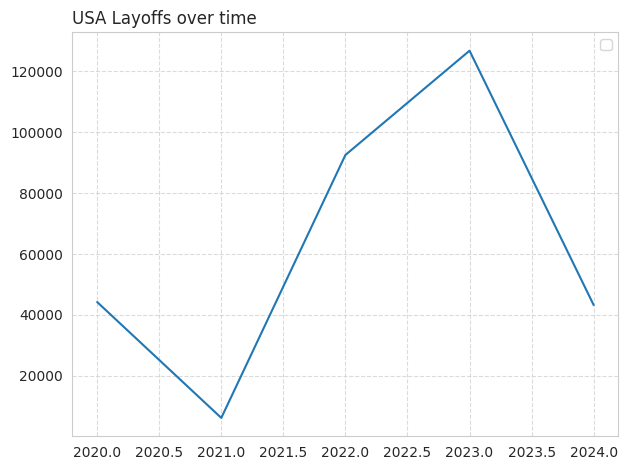

In [27]:
# Plotting
plt.plot(USA_layoffs_over_time)
plt.grid(linestyle='--', alpha=0.7)
plt.title('USA Layoffs over time', loc='left', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# USA Layoffs by industry
USA_layoffs_by_industry = df_USA.groupby('Industry')['Laid_Off'].sum()
USA_layoffs_by_industry = USA_layoffs_by_industry.sort_values(ascending=False).head(10)
USA_layoffs_by_industry

Industry
Consumer          54197.0
Retail            45112.0
Other             26232.0
Transportation    23270.0
Finance           19679.0
Hardware          16651.0
Sales             13824.0
Real Estate       13511.0
Healthcare        11523.0
Food              10570.0
Name: Laid_Off, dtype: float64

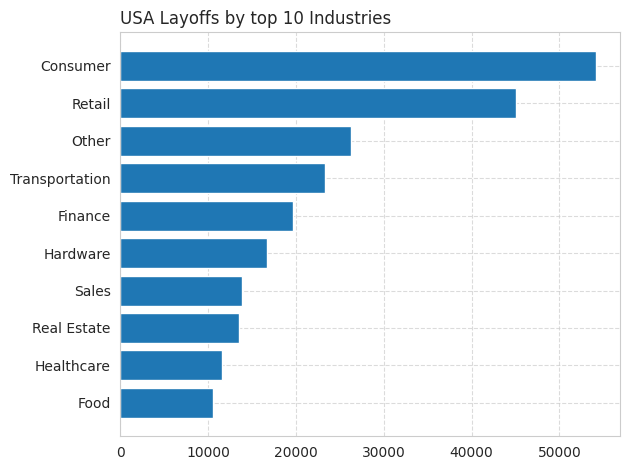

In [29]:
# Plotting
# Plot stacked bars for layoffs_by_industry
plt.barh(USA_layoffs_by_industry.index, USA_layoffs_by_industry.values)

plt.title('USA Layoffs by top 10 Industries', loc='left', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the longest title on top
plt.tight_layout()
plt.show()

In [30]:
# USA Layoffs by company
USA_layoffs_by_company = df_USA.groupby('Company')['Laid_Off'].sum()
USA_layoffs_by_company = layoffs_by_company.sort_values(ascending=False).head(10)
USA_layoffs_by_company

Company
Amazon                   27580.0
Meta                     21000.0
Google                   13000.0
Microsoft                11900.0
SAP                      11000.0
SaleSan Franciscoorce    10000.0
Ericsson                  8500.0
Cisco                     8350.0
Flink                     8100.0
Uber                      7725.0
Name: Laid_Off, dtype: float64

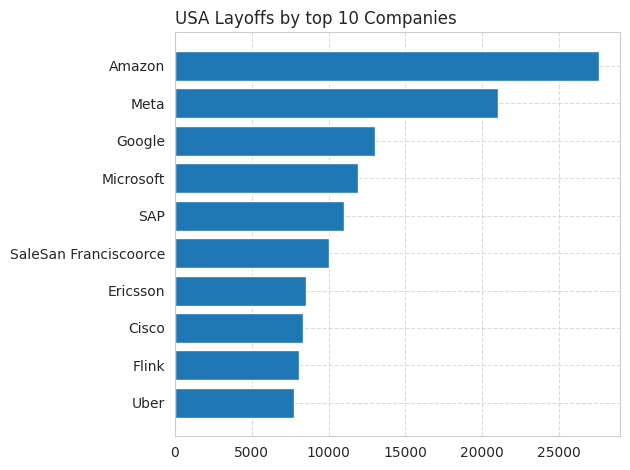

In [31]:
# Plotting
# Plot stacked bars for layoffs_by_company
plt.barh(USA_layoffs_by_company.index, USA_layoffs_by_company.values)

plt.title('USA Layoffs by top 10 Companies', loc='left', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the longest title on top
plt.tight_layout()
plt.show()

### Brazil Scenario

In [32]:
# Brazil scenario
df_BR = df.query("Country == 'Brazil'")
df_BR

,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,month
95,Gupy,Sao Paulo,Brazil,South America,58.0,2023-08-02,8.0,725.0,667.0,HR,Series B,$105,2023,<bound method PandasDelegate._add_delegate_acc...
154,Trybe,Sao Paulo,Brazil,South America,128.0,2023-06-09,35.0,366.0,238.0,Education,Series B,$40,2023,<bound method PandasDelegate._add_delegate_acc...
290,Loft,Sao Paulo,Brazil,South America,340.0,2023-03-03,15.0,2267.0,1927.0,Real Estate,Unknown,$788,2023,<bound method PandasDelegate._add_delegate_acc...
296,iFood,Sao Paulo,Brazil,South America,355.0,2023-03-01,6.0,5917.0,5562.0,Food,Subsidi…,$2100,2023,<bound method PandasDelegate._add_delegate_acc...
323,Neon,Sao Paulo,Brazil,South America,210.0,2023-02-15,9.0,2333.0,2123.0,Finance,Series D,$720,2023,<bound method PandasDelegate._add_delegate_acc...
353,Loggi,Sao Paulo,Brazil,South America,300.0,2023-02-06,7.0,4286.0,3986.0,Logistics,Series F,$507,2023,<bound method PandasDelegate._add_delegate_acc...
407,Enjoei,Sao Paulo,Brazil,South America,31.0,2023-01-20,10.0,310.0,279.0,Retail,Unknown,$14,2023,<bound method PandasDelegate._add_delegate_acc...
430,Unico,Sao Paulo,Brazil,South America,110.0,2023-01-17,10.0,1100.0,990.0,Other,Series D,$336,2023,<bound method PandasDelegate._add_delegate_acc...
438,Pier,Sao Paulo,Brazil,South America,111.0,2023-01-12,39.0,285.0,174.0,Finance,Series B,$42,2023,<bound method PandasDelegate._add_delegate_acc...
496,Alice,Sao Paulo,Brazil,South America,113.0,2022-12-09,16.0,706.0,593.0,Healthcare,Series C,$174,2022,<bound method PandasDelegate._add_delegate_acc...


In [33]:
# Total Layoffs in Brazil
BR_Total_Layoffs = df_BR['Laid_Off'].sum()
BR_Total_Layoffs

7029.0

In [34]:
# % of Total
BR_pct_total_layoffs = BR_Total_Layoffs/df['Laid_Off'].sum()*100
BR_pct_total_layoffs

1.6140921334536613

In [35]:
# Brazil Layoffs Trend over time
BR_layoffs_over_time = df_BR.groupby('Year')['Laid_Off'].sum()
BR_layoffs_over_time

Year
2020    1227.0
2022    4159.0
2023    1643.0
Name: Laid_Off, dtype: float64

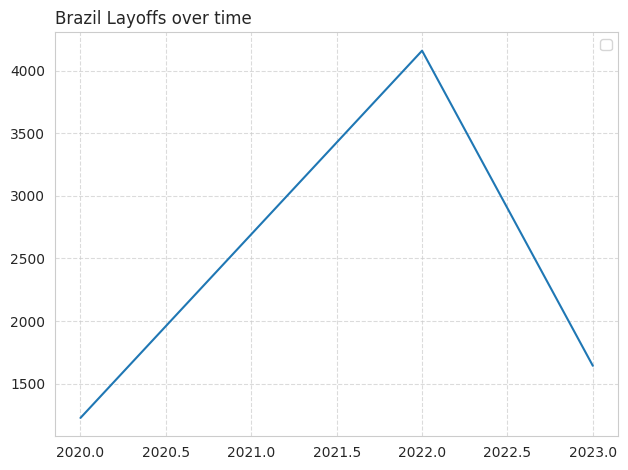

In [36]:
# Plotting
plt.plot(BR_layoffs_over_time)
plt.grid(linestyle='--', alpha=0.7)
plt.title('Brazil Layoffs over time', loc='left', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# Brazil Layoffs by industry
BR_layoffs_by_industry = df_BR.groupby('Industry')['Laid_Off'].sum()
BR_layoffs_by_industry = BR_layoffs_by_industry.sort_values(ascending=False).head(10)
BR_layoffs_by_industry

Industry
Real Estate    1331.0
Finance        1305.0
Logistics       800.0
Retail          621.0
Food            555.0
Fitness         467.0
Marketing       327.0
Education       319.0
Consumer        311.0
Healthcare      248.0
Name: Laid_Off, dtype: float64

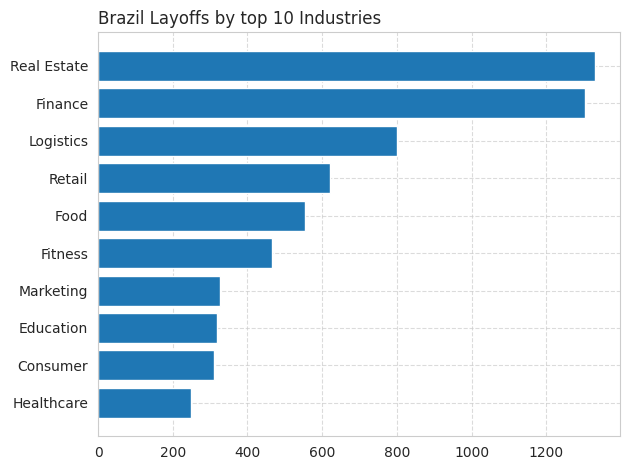

In [42]:
# Plotting
# Plot stacked bars for Brazil layoffs_by_industry
plt.barh(BR_layoffs_by_industry.index, BR_layoffs_by_industry.values)

plt.title('Brazil Layoffs by top 10 Industries', loc='left', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the longest title on top
plt.tight_layout()
plt.show()

In [39]:
# Brazil Layoffs by company
BR_layoffs_by_company = df_BR.groupby('Company')['Laid_Off'].sum()
BR_layoffs_by_company = BR_layoffs_by_company.sort_values(ascending=False).head(10)
BR_layoffs_by_company

Company
Loft                1083.0
Loggi                800.0
Gympass              467.0
Ebanx                402.0
iFood                355.0
Wildlife Studios     300.0
Neon                 280.0
Facily               260.0
QuintoAndar          248.0
Hotmart              227.0
Name: Laid_Off, dtype: float64

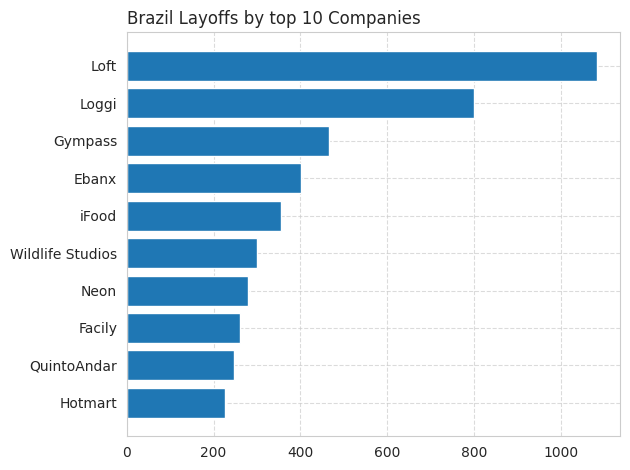

In [40]:
# Plotting
# Plot stacked bars for Brazil layoffs_by_company
plt.barh(BR_layoffs_by_company.index, BR_layoffs_by_company.values)

plt.title('Brazil Layoffs by top 10 Companies', loc='left', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the longest title on top
plt.tight_layout()
plt.show()

## Insights

- **Highest Layoffs in 2023:** The year 2023 witnessed the highest number of layoffs globally, followed by 2022.
- **Industry Leaders in Layoffs:** The retail and consumer industries experienced the most layoffs, with Amazon leading as the top company for global layoffs.
- **USA's Dominance:** The United States accounted for 71% of global layoffs, with the highest number occurring in 2023. Amazon had the most layoffs, followed by Meta, Google, and Microsoft.
- **Brazil's Layoff Statistics:** Brazil represented 1.6% of global layoffs, peaking in 2022. The real estate and finance industries had the highest number of layoffs, with Loft, Loggi, and Gympass being the top three companies.